<a href="https://colab.research.google.com/github/nidhaloff/plot_best_fit_line/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import pandas as pd
%matplotlib inline

In [0]:
sns.set_style(style='whitegrid')
plt.rcParams["patch.force_edgecolor"] = True

In [0]:

m = 2 # slope
c = 3 # intercept

In [0]:

x = np.random.rand(256)

In [0]:
noise = np.random.randn(256) / 4

In [0]:

y = x * m + c + noise

In [96]:
df = pd.DataFrame()
df['x'] = x
df['y'] = y
df.tail(20)

,x,y
236,0.843239,4.403061
237,0.589015,4.359118
238,0.806162,5.178989
239,0.885376,5.200037
240,0.337074,3.418367
241,0.764638,4.635787
242,0.316767,3.900268
243,0.312731,3.621904
244,0.437554,4.134089
245,0.466904,3.619501


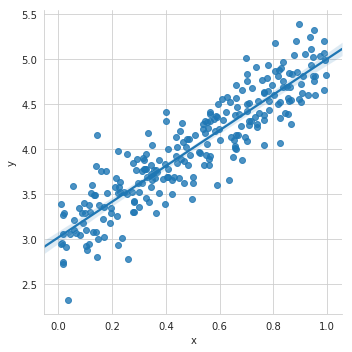

In [97]:

sns.lmplot(x='x', y='y', data=df)

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable


In [0]:
x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')

In [0]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [101]:
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]
input_dim, output_dim

(1, 1)

In [0]:
model = LinearRegressionModel(input_dim, output_dim)

In [103]:
criterion = nn.MSELoss()
[w, b] = model.parameters()
def get_param_values():
    return w.data[0][0], b.data[0]

print(w.shape, b.shape, x_train.shape, y_train.shape)

torch.Size([1, 1]) torch.Size([1]) (256, 1) (256, 1)


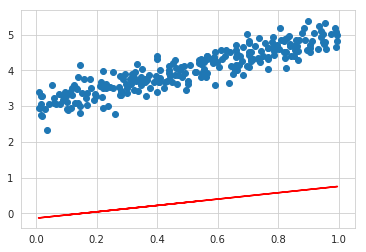

In [110]:
# take a look another time at the data
best_fit = x_train*w.detach().numpy() + b.detach().numpy()
plt.scatter(x_train, y_train)
plt.plot(x_train, best_fit, color="red")
plt.show()

In [0]:
def plot_current_fit(title=""):
    plt.figure(figsize=(12,4))
    plt.title(title)
    plt.scatter(x, y, s=8)
    w1 = w.data[0][0]
    b1 = b.data[0]
    x1 = np.array([0., 1.])
    y1 = x1 * w1.numpy() + b1.numpy()
    plt.plot(x1, y1, 'r', label='Current Fit ({:.3f}, {:.3f})'.format(w1, b1))
    plt.xlabel('x (input)')
    plt.ylabel('y (target)')
    plt.legend()
    plt.show()

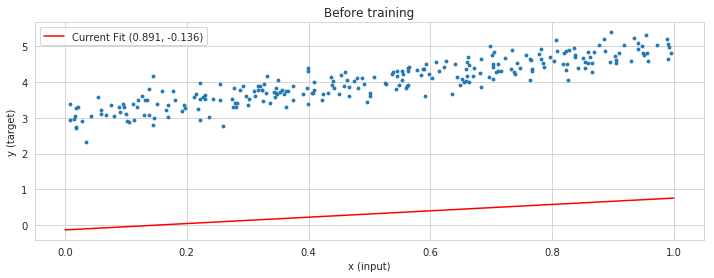

In [106]:
plot_current_fit('Before training')

In [0]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [0]:
def run_epoch(epoch):
    # Convert from numpy array to torch tensors
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear the gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get the outputs
    outputs = model(inputs)
    
    # Calcuate loss
    loss = criterion(outputs, labels)
    
    # Getting gradients from parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
#     print('epoch {}, loss {}'.format(epoch, loss.data[0]))
    
    return loss

In [116]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax1 = plt.subplots(1, figsize=(12, 6))
ax1.scatter(x_train, y_train, s=8)

w1, b1 = get_param_values()
x1 = np.array([0., 1.])
y1 = x1 * w1.numpy() + b1.numpy()
fit = ax1.plot(x1, y1, 'r', label='Predicted'.format(w1, b1))
ax1.plot(x1, x1 * m + c, 'g', label='Real')
ax1.legend()
ax1.set_title('Linear Regression')

def init():
    ax1.set_ylim(0, 6)
    return fit,

def animate(i):
    loss = run_epoch(i)
    w1, b1 = get_param_values()
    y1 = x1 * w1.numpy() + b1.numpy()
    fit.set_ydata(y1)

epochs = np.arange(1, 250)
ani = FuncAnimation(fig, animate, epochs, init_func=init, interval=100, blit=True, repeat=False)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
